In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading The Data

In [ ]:
from google.colab import files
files=files.upload()

Converting the csv file into Dataframe

In [6]:
data=pd.read_csv('Diabetes1.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  ...   Age  Patient-id  Outcome
0              6      148             72  ...  50.0        2001        1
1              1       85             66  ...  31.0        2002        0
2              8      183             64  ...  32.0        2003        1
3              1       89             66  ...  21.0        2004        0
4              0      137             40  ...  33.0        2005        1
..           ...      ...            ...  ...   ...         ...      ...
794            0      180             87  ...   NaN        2781        1
795            8      155             79  ...   NaN        2782        1
796            7      138             91  ...  40.0        2783        0
797           10      103             78  ...   NaN        2784        0
798            1      108             78  ...  27.0        2785        0

[799 rows x 10 columns]


Data Preprocessing

Data Deduplication

In [7]:
df=data.sort_values('Patient-id',axis=0,ascending='true')
df.shape

(799, 10)

In [8]:
df1=df.drop_duplicates(subset={'Patient-id'},keep='first',inplace=False)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Patient-id,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,2001,1
1,1,85,66,29,0,26.6,0.351,31.0,2002,0
2,8,183,64,0,0,23.3,0.672,32.0,2003,1
3,1,89,66,23,94,28.1,0.167,21.0,2004,0
4,0,137,40,35,168,43.1,2.288,33.0,2005,1
...,...,...,...,...,...,...,...,...,...,...
794,0,180,87,43,511,44.0,0.223,NaN,2781,1
795,8,155,79,33,0,33.0,0.444,NaN,2782,1
796,7,138,91,42,0,33.0,0.390,40.0,2783,0
797,10,103,78,50,180,34.0,0.172,NaN,2784,0


Handling Missing values

In [9]:
df2=df1.fillna(axis=0,method='ffill')
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Patient-id,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,2001,1
1,1,85,66,29,0,26.6,0.351,31.0,2002,0
2,8,183,64,0,0,23.3,0.672,32.0,2003,1
3,1,89,66,23,94,28.1,0.167,21.0,2004,0
4,0,137,40,35,168,43.1,2.288,33.0,2005,1
...,...,...,...,...,...,...,...,...,...,...
794,0,180,87,43,511,44.0,0.223,27.0,2781,1
795,8,155,79,33,0,33.0,0.444,27.0,2782,1
796,7,138,91,42,0,33.0,0.390,40.0,2783,0
797,10,103,78,50,180,34.0,0.172,40.0,2784,0


Using method parameter, missing values can be replaced with values before or after them. fffill stands for forward fill that means the previous row value will be filled. bfill stands for backward fill that means the next row row value will be filled.

In [10]:
df2['Outcome'].value_counts()

0    509
1    276
Name: Outcome, dtype: int64

Data Visualisation Using Exploratory Data Analysis

2-D scatter plot 

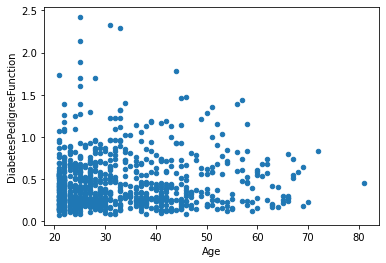

In [26]:
df2.plot(kind='scatter',x='Age',y='DiabetesPedigreeFunction')
plt.show()

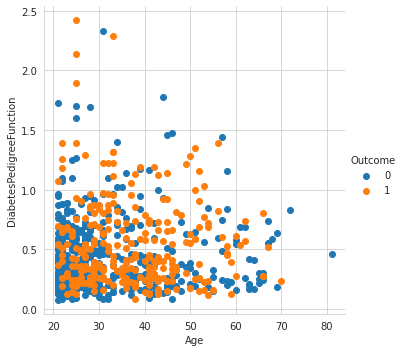

In [27]:
sns.set_style('whitegrid')
sns.FacetGrid(df2,hue='Outcome',height=5).map(plt.scatter,'Age','DiabetesPedigreeFunction').add_legend()
plt.show()

Oservation

This is the 2-D scatter plot for the features 'Age' and 'DiabetesPedigreeFunction' , By this we can say using these two features we cannot do best classification as points are more likely to be overlapping.

As we are unable to know which features we have to consider we can use pair plots

Pair plots

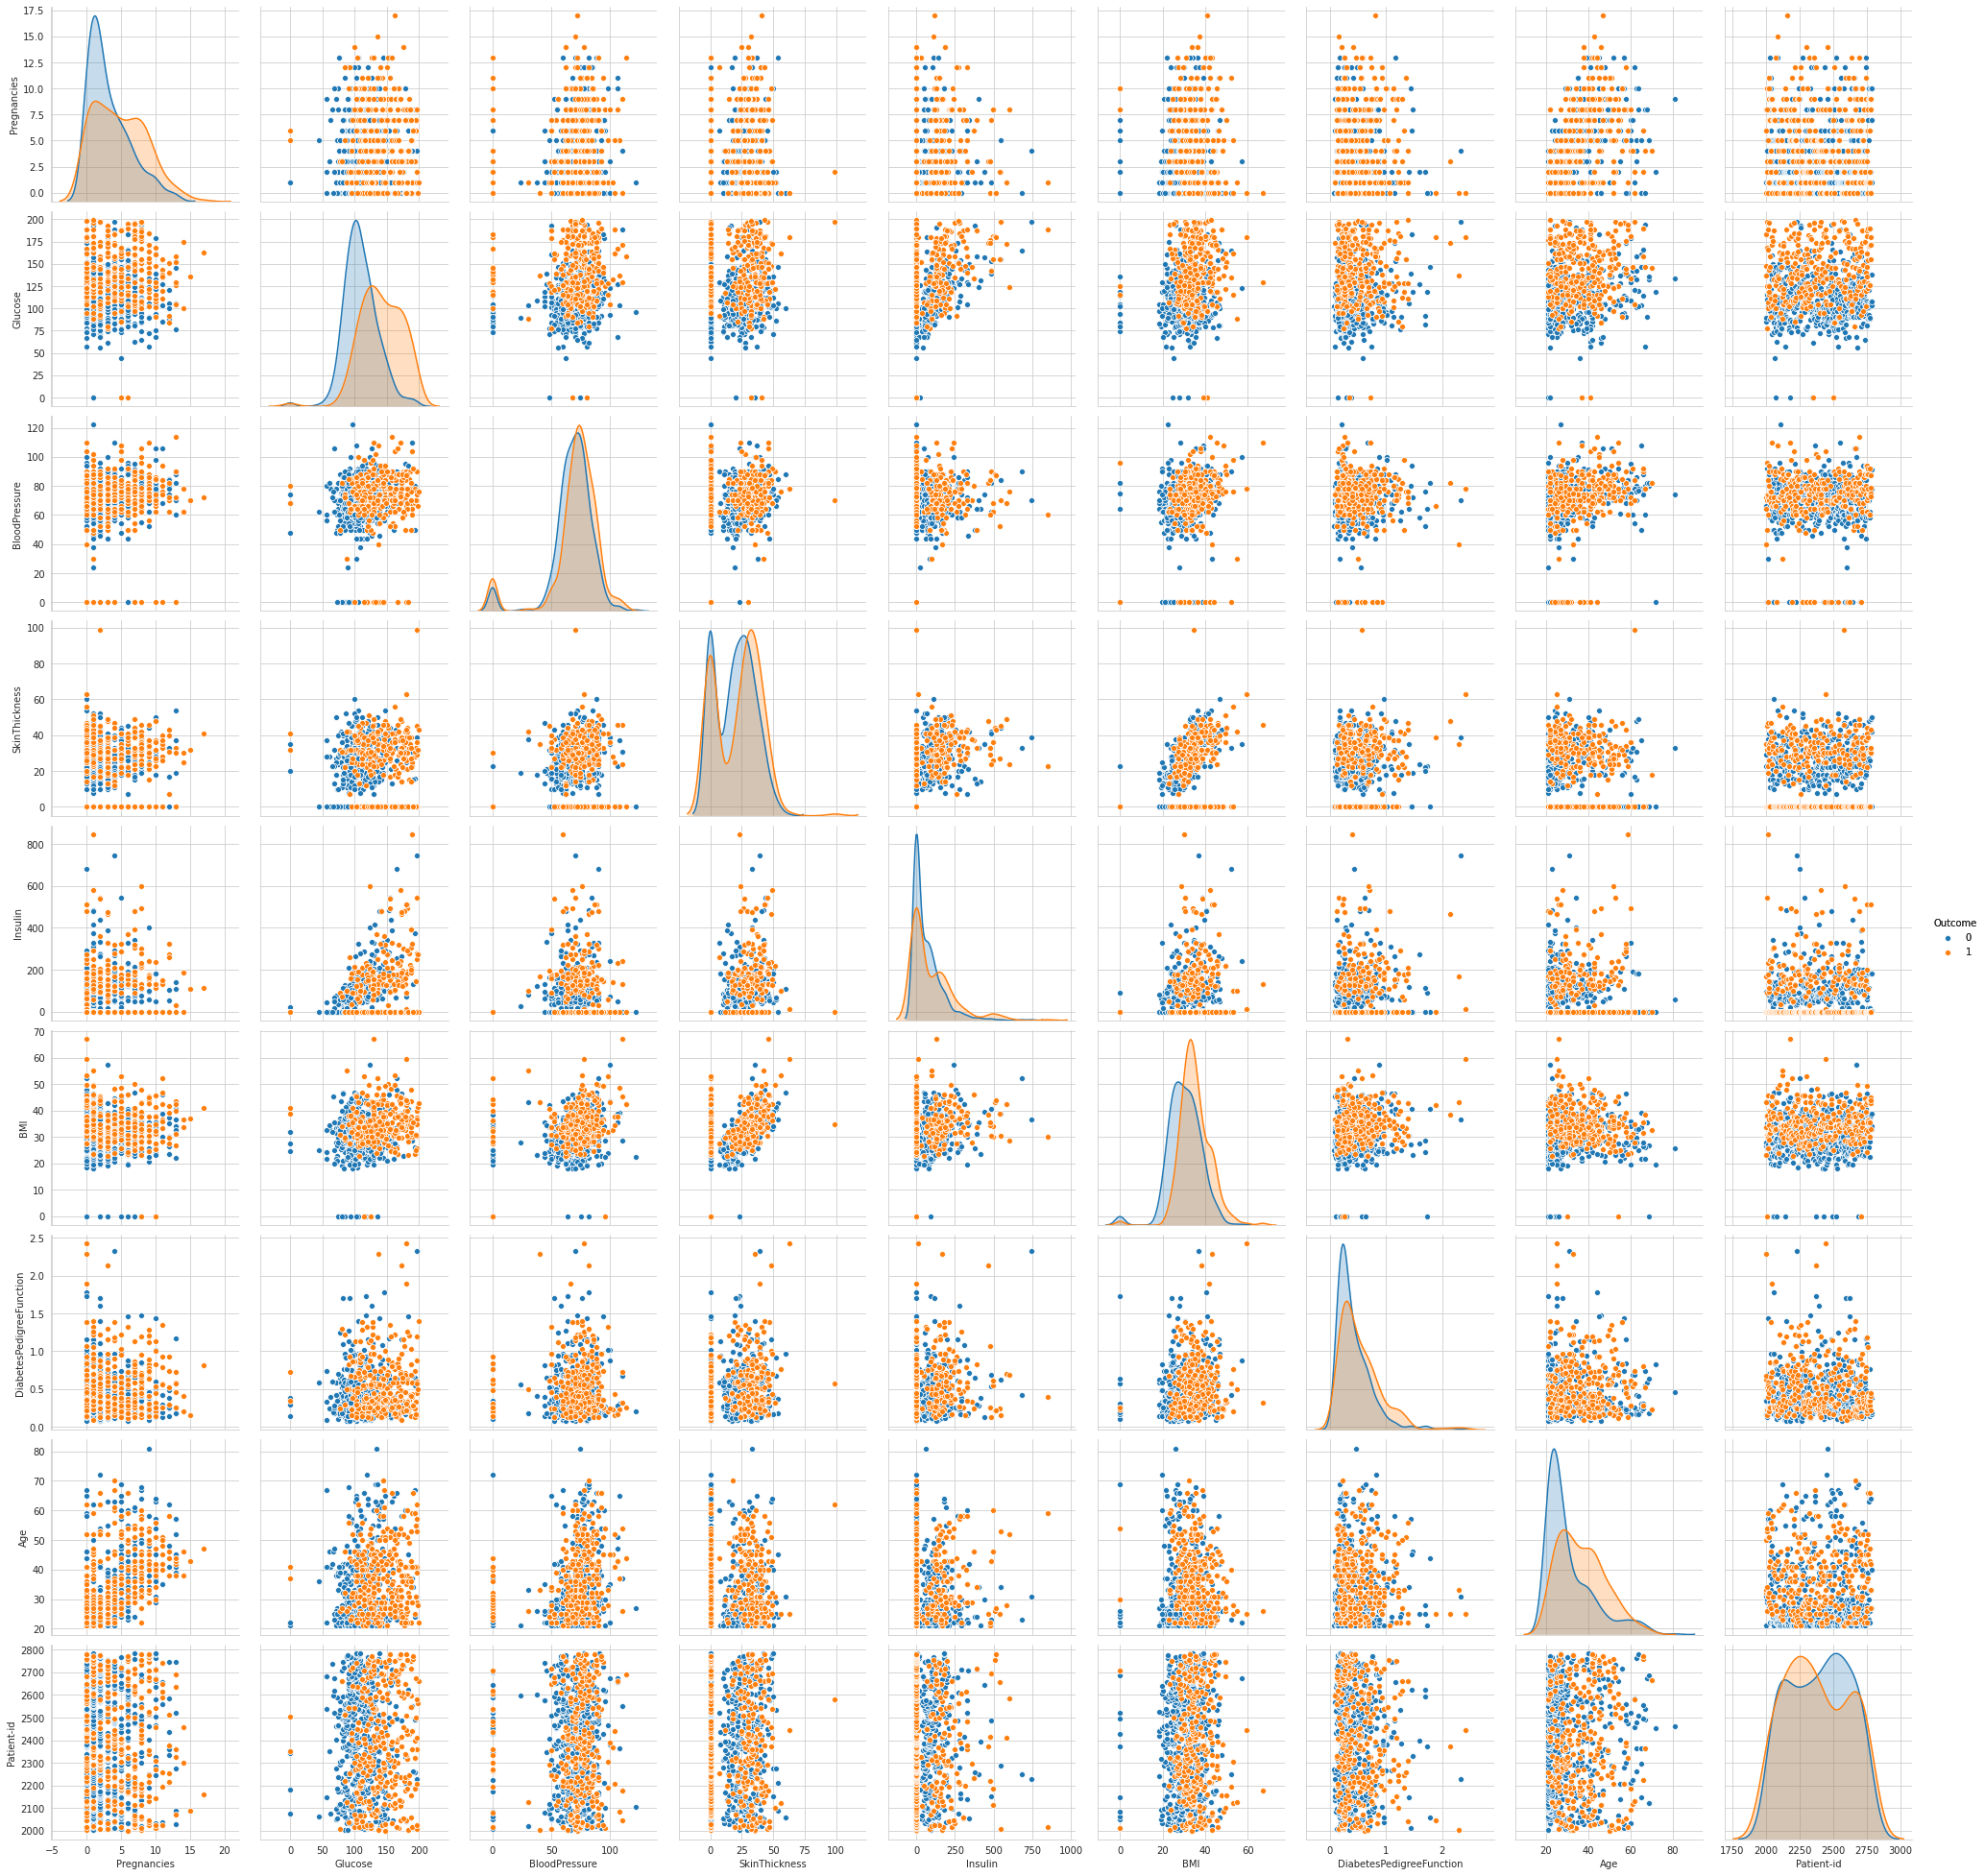

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df2,hue='Outcome',height=3).add_legend()
plt.show()

From the pair plots we are not able to classify using the pairs of features. But from pair plots when we observe if x-axis and y-axis values are same there is some scope to classify. So we can use 1-D scatter plot using histograms,pdf and cdf and we can do univariate analysis to classify.

Univariate Analysis Using Histogram , cdf , pdf

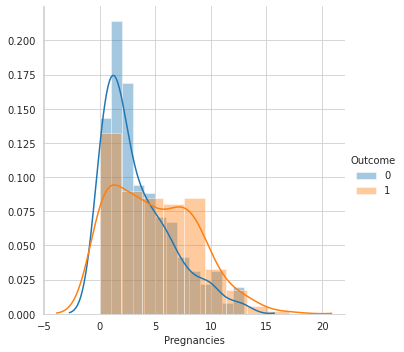

In [ ]:
sns.FacetGrid(df2,hue='Outcome',height=5).map(sns.distplot,'Pregnancies').add_legend()
plt.show()

From the above histogram we can conclude that if pregnancies are greater than 5 there is high chance of having diabetes.

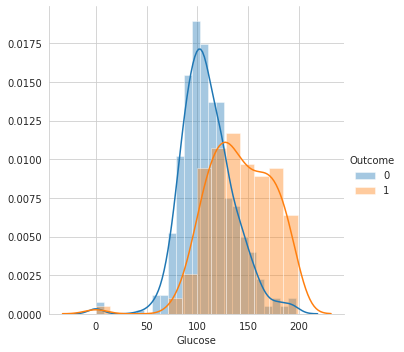

In [ ]:
sns.FacetGrid(df2,hue='Outcome',height=5).map(sns.distplot,'Glucose').add_legend()
plt.show()

From above histogram we can conclude that if glucose is ~>125 the person is more likely to have diabetes.

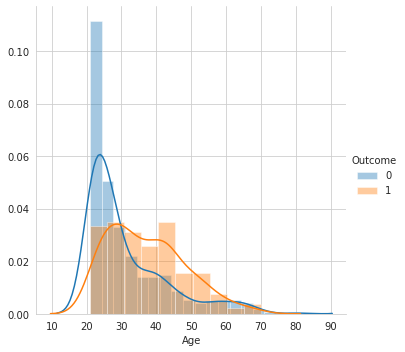

In [ ]:
sns.FacetGrid(df2,hue='Outcome',height=5).map(sns.distplot,'Age').add_legend()
plt.show()

From above histogram we can conclude that the person with age above 30 is more likely to have diabetes.

From the above univariate analysis we can conclude that , From above picked three features 'Glucose' is the best Feature.

Box-Plot

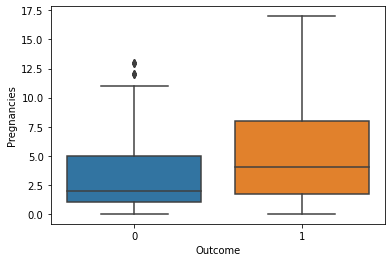

In [13]:
sns.boxplot(x='Outcome',y='Pregnancies', data=df2)
plt.show()

Observation

When we take the threshold as 5 , We will be getting 55% error in class 1 because when we take 55th percentile value there are 55% values less than value at 55th percentile. And 25% error in class 0 as the threshold value is at 75th pecentile.

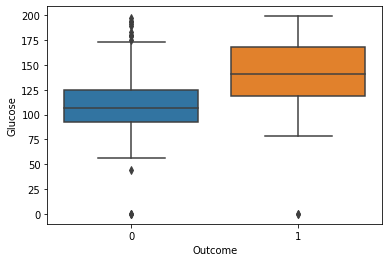

In [14]:
sns.boxplot(x='Outcome',y='Glucose', data=df2)
plt.show()

When we take the box plot of Glucose, we have taken the threshold as 125 , for class 125 is at 75th percentile, therefore 75% points are less than this and will be classified as class 0 and remaining 25% points will be misclassified.In class 1 125 is at 25th percentile , so 25% of points have value less than 125, These 25% points are misclassified. In both class 0 and 1 there is 25% error.

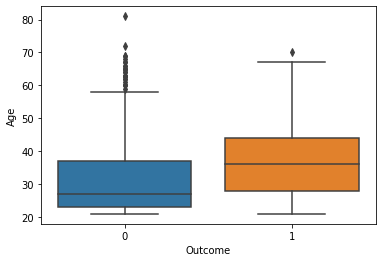

In [15]:
sns.boxplot(x='Outcome',y='Age', data=df2)
plt.show()

When we take the threshold as 30, The value 30 is at 60th percentile approximately 60% of values are correctly classified and 40% are misclassified so we have 40% error in class 0. In class 1 30 is at 30 th percentile approximately therefore 30% points are misclassified and 70% values are correctly classified , In class 1 we have 30% error.

Observation

From these three we can conclude that taking 'Glucose' as feature is best to classify Whether a Patient is Diabetic or Non-Diabetic.

But in Machine learning using a single feature and predicting is not so Appropriate.

3-D scatter plot

In [29]:
import plotly.express as px
plt = px.scatter_3d(df2, x='Pregnancies', y='Glucose', z='Age', color='Outcome', symbol='Outcome') 
plt.show()

Using these features also we are not able classify

We can the best features using dimensionality reduction. One of the basic techniques in dimensonality reduction is PCA(principal component analysis). If there are only 2 features and when we want to perform dimensonality reduction in such a way that if two features have approiximately same spread, Then we rotate the x-axis in such a way that it gets the spread and will be drawing a perpendicular to rotated x axis which is rotated y axis. Now rotated x axis will have maximum spread so feature on x axis will have maximum spread and will eliminate feature on y axis.

If there are more than 2 features then we will calculate eigen values and eigen vectors for each feature and we will be picking the top 2 faetures and we will be visualising the data.

In [29]:
data1=df2[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Patient-id',]]
labels=df2['Outcome']
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data1)
sample_data=standardized_data
print(sample_data.shape)

(785, 9)


PCA for the data

In [131]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df3=pca.fit_transform(sample_data)
pca_data=np.vstack((df3.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))

Using t-SNE(t-distribution Stochastic Neighbourhood Embeeding)

In [130]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=200,n_iter=20000)
tsne_data=model.fit_transform(sample_data)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2","label"))

Using PCA Top 2 features on Different Machine Learning MOdels

Decision Tree

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


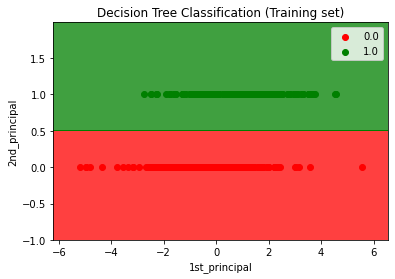

[[136   0]
 [  0  61]]


In [154]:
X = pca_df.iloc[:, [0,2]].values
y = pca_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('1st_principal')
plt.ylabel('2nd_principal')
plt.legend()
plt.show()
print(cm)

Random Forest

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


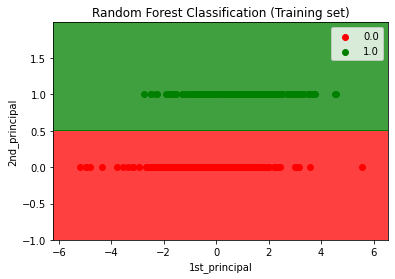

[[136   0]
 [  0  61]]


In [155]:
X = pca_df.iloc[:, [0,2]].values
y = pca_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('1st_principal')
plt.ylabel('2nd_principal')
plt.legend()
plt.show()
print(cm)


Support Vector Machine

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


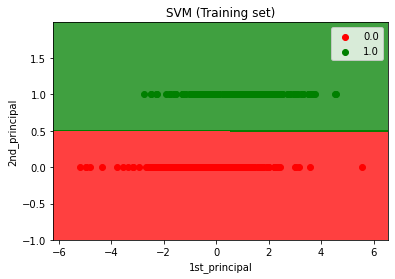

[[136   0]
 [  0  61]]


In [156]:
X = pca_df.iloc[:, [0,2]].values
y = pca_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('1st_principal')
plt.ylabel('2nd_principal')
plt.legend()
plt.show()
print(cm)

Kernel SVM

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


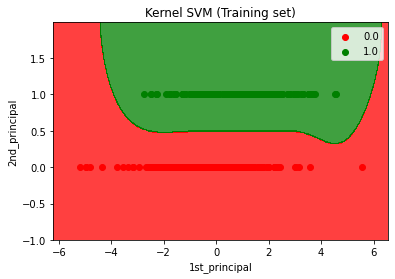

[[136   0]
 [  1  60]]


In [157]:
X = pca_df.iloc[:, [0,2]].values
y = pca_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('1st_principal')
plt.ylabel('2nd_principal')
plt.legend()
plt.show()
print(cm)

Using t-SNE Features on different Machine Learning algorithms

Decision Tree

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


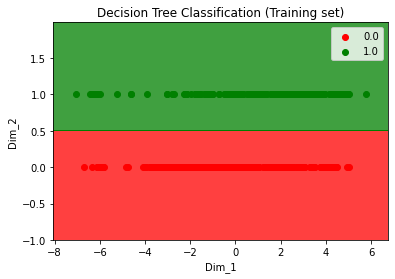

[[136   0]
 [  0  61]]


In [158]:
X = tsne_df.iloc[:, [0,2]].values
y = tsne_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.legend()
plt.show()
print(cm)

Random Forest

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


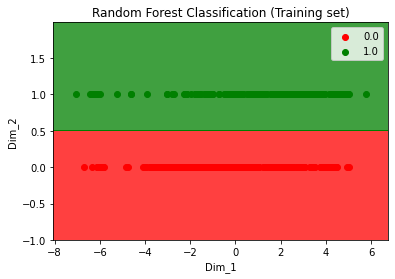

[[136   0]
 [  0  61]]


In [159]:
X = tsne_df.iloc[:, [0,2]].values
y = tsne_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.legend()
plt.show()
print(cm)

Support Vector Machine

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


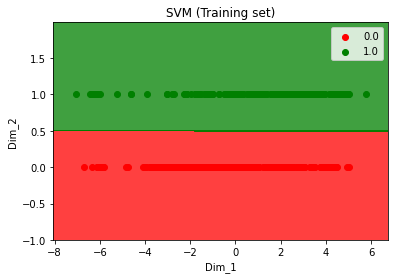

[[136   0]
 [  0  61]]


In [160]:
X = tsne_df.iloc[:, [0,2]].values
y = tsne_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.legend()
plt.show()
print(cm)

Kernel SVM

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


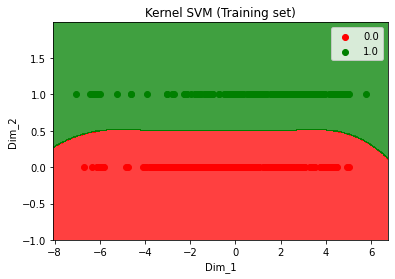

[[136   0]
 [  0  61]]


In [161]:
X = tsne_df.iloc[:, [0,2]].values
y = tsne_df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.legend()
plt.show()
print(cm)